# Plots

In [2]:
import matplotlib.pyplot as plt

In [13]:
mistral_whole = {
    "total": 0.5206751054852321,
    "extrinsic-NP": 0.9082969432314411,
    "extrinsic-predicate": 0.0,
    "intrinsic-NP": 0.0,
    "intrinsic-predicate": 0.0,
    "correct": 0.7584905660377359
}

mistral_under = {
    "total": 0.3025,
    "extrinsic-NP": 0.35365853658536583,
    "extrinsic-predicate": 0.0625,
    "intrinsic-NP": 0.023529411764705882,
    "intrinsic-predicate": 0.45121951219512196,
    "correct": 0.676056338028169
}

mistral_over = {
    "total": 0.572961373390558,
    "extrinsic-NP": 0.3419354838709677,
    "extrinsic-predicate": 0.5783898305084746,
    "intrinsic-NP": 0.4457831325301205,
    "intrinsic-predicate": 0.6781115879828327,
    "correct": 0.8508158508158508
}

llama_whole = {
    "total": 0.5721518987341773,
    "extrinsic-NP": 0.9125799573560768,
    "extrinsic-predicate": 0.1407035175879397,
    "intrinsic-NP": 0.023255813953488372,
    "intrinsic-predicate": 0.0,
    "correct": 0.8226415094339623
}

llama_under = {
    "total": 0.3225,
    "extrinsic-NP": 0.47435897435897434,
    "extrinsic-predicate": 0.13793103448275862,
    "intrinsic-NP": 0.13953488372093023,
    "intrinsic-predicate": 0.18518518518518517,
    "correct": 0.7794117647058824
}

llama_over = {
    "total": 0.5103004291845493,
    "extrinsic-NP": 0.43412526997840173,
    "extrinsic-predicate": 0.390625,
    "intrinsic-NP": 0.2638580931263858,
    "intrinsic-predicate": 0.6078028747433265,
    "correct": 0.8274428274428275
}

# ==================== Baselines ====================

mistral_whole_baseline = {
    "total": 0.27932489451476794,
    "extrinsic-NP": 0.4092827004219409,
    "extrinsic-predicate": 0.44148936170212766,
    "intrinsic-NP": 0.027472527472527472,
    "intrinsic-predicate": 0.13580246913580246,
    "correct": 0.14615384615384616
}

mistral_under_baseline = {
    "total": 0.2375,
    "extrinsic-NP": 0.4588235294117647,
    "extrinsic-predicate": 0.43037974683544306,
    "intrinsic-NP": 0.0,
    "intrinsic-predicate": 0.16279069767441862,
    "correct": 0.10126582278481013
}

mistral_over_baseline = {
    "total": 0.23776824034334765,
    "extrinsic-NP": 0.46551724137931033,
    "extrinsic-predicate": 0.4369918699186992,
    "intrinsic-NP": 0.011160714285714286,
    "intrinsic-predicate": 0.1431578947368421,
    "correct": 0.11086474501108648
}

llama_whole_baseline = {
    "total": 0.2540084388185654,
    "extrinsic-NP": 0.13616071428571427,
    "extrinsic-predicate": 0.20430107526881722,
    "intrinsic-NP": 0.125,
    "intrinsic-predicate": 0.08888888888888889,
    "correct": 0.6035087719298246
}

llama_under_baseline = {
    "total": 0.25,
    "extrinsic-NP": 0.1323529411764706,
    "extrinsic-predicate": 0.15384615384615385,
    "intrinsic-NP": 0.11904761904761904,
    "intrinsic-predicate": 0.17073170731707318,
    "correct": 0.625
}

llama_over_baseline = {
    "total": 0.2575107296137339,
    "extrinsic-NP": 0.17427385892116182,
    "extrinsic-predicate": 0.2702702702702703,
    "intrinsic-NP": 0.13179916317991633,
    "intrinsic-predicate": 0.15268817204301074,
    "correct": 0.5683297180043384
}

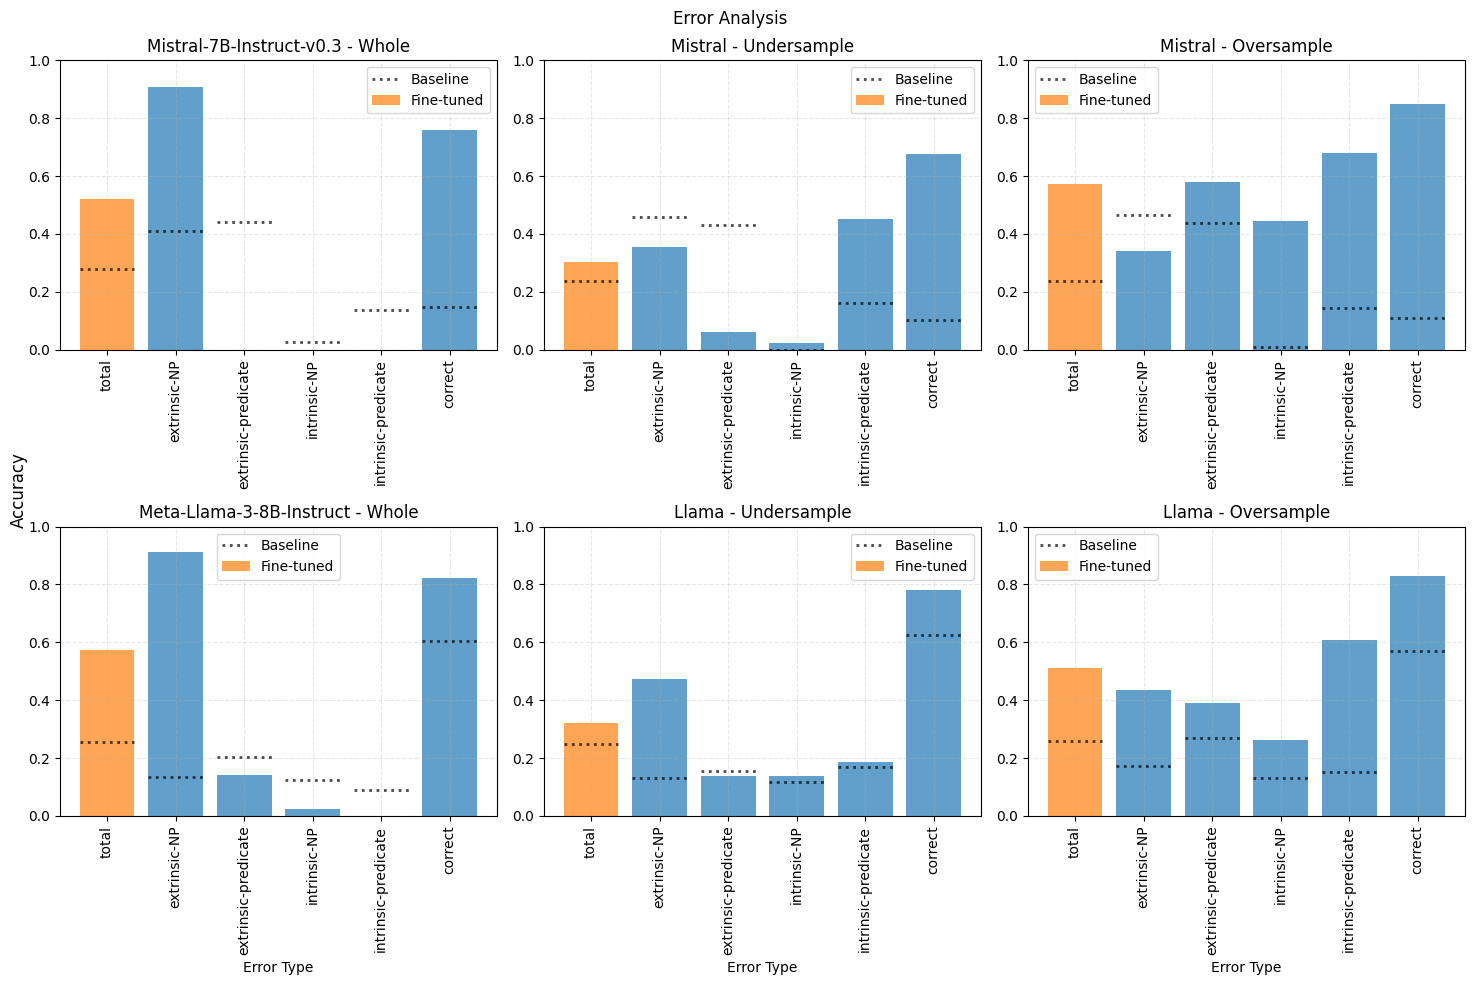

In [35]:
# List of data dictionaries
datasets = [mistral_whole, mistral_under, mistral_over, llama_whole, llama_under, llama_over]
baselines = [mistral_whole_baseline, mistral_under_baseline, mistral_over_baseline, llama_whole_baseline, llama_under_baseline, llama_over_baseline]
labels = ["Mistral-7B-Instruct-v0.3 - Whole", "Mistral - Undersample", "Mistral - Oversample", 
          "Meta-Llama-3-8B-Instruct - Whole", "Llama - Undersample", "Llama - Oversample"]

# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through datasets and axes
for i, (data, base, ax) in enumerate(zip(datasets, baselines, axs)):
    keys = list(data.keys())
    values = list(data.values())
    baseline_keys = list(base.keys())
    baseline_values = list(base.values())
    
    # Assign colors: Red for 'total', blue for others
    colors = ['C1' if key == 'total' else 'C0' for key in keys]

    ax.bar(keys, values, color=colors, alpha=0.7, label='Fine-tuned')
    baseline_bars = ax.bar(baseline_keys, baseline_values, color='C3', alpha=0)
    ax.set_title(labels[i])

    # Adding a dotted line at the top of each baseline bar
    for j, bar in enumerate(baseline_bars):
        height = bar.get_height()
        if j == 0:
            # Only add a label for the first dotted line for legend
            ax.plot([bar.get_x(), bar.get_x() + bar.get_width()], [height, height], 
                    linestyle=':', color='black', linewidth=2, alpha=0.7, label='Baseline')
        else:
            ax.plot([bar.get_x(), bar.get_x() + bar.get_width()], [height, height], 
                    linestyle=':', color='black', linewidth=2, alpha=0.7)
    ax.set_ylim(0, 1)  # Assuming values are in the range 0 to 1
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    ax.legend()

# Set xlabel for the bottom row subplots
for ax in axs[3:]:
    ax.set_xlabel('Error Type')

fig.supylabel('Accuracy')
fig.suptitle('Error Analysis')
#fig.legend(['Fine-tuned', 'Baseline'], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()